# Importing Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import time
data_file = './Data/Mood_Dataset.csv'

# Importing Data 

In [2]:
df = pd.read_csv(data_file)

In [3]:
to_drop = ['happiness','energeticness']
X_df = df.drop(to_drop,axis=1)
y_df = df[to_drop]

# Preprocessing Data

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Splitting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_df)

# Applying Inbuilt Linear Regression Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
preds = model.predict(X_test)
mean_squared_error(y_test,preds)

0.18297425274388912

# Creating our own model from Scratch

In [8]:
class LinReg:
    def __init__(self, lr=0.01, itr=500):
        self.lr = lr
        self.itr = itr

    # ========  Algorithm  ======== 
    
    '''
    fit(X, y) : fitting model to the data X and y.
                X is Features
                y is target variable
    '''
    def fit(self, X, y):
        # cost_ stores all cost of iterations for plotting in future
        self.cost_ = []
        # w_ is learable param
        self.w_ = np.zeros((X.shape[1], 1))
        # m = number of samples
        m = X.shape[0]

        # running model for 'itr' times
        for _ in range(self.itr):
            
            # predictions of our model
            y_pred = np.dot(X, self.w_)

            residuals = []
            
            for indx in range(len(y_pred)):
                residuals.append(y_pred[indx] - y[indx])
                
            residuals = np.array(residuals)

            # calculating gradient
            gradient_vector = np.dot(X.T, residuals)

            
            # updating params
            self.w_ -= (self.lr / m) * gradient_vector
            
            # calculating cost
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
            
        return self
    '''
    predict(X) : returns predictions generated by our model from data X
                X is features
    '''
    def predict(self, X):
        return np.dot(X, self.w_)
    
    # ========  Plotting ======== 
    def plot_cost(self):
        plt.plot(reg1.cost_)
        return plt

In [10]:
reg1 = LinReg()
y_train_h = np.array(y_train['happiness'])
y_train_h.reshape(514, 1)

reg1 = reg1.fit(X_train, y_train_h)

preds1 = reg1.predict(X_test)
print(mean_squared_error(preds1, y_test['happiness']))

0.2459399555867481


Text(0, 0.5, 'Cost')

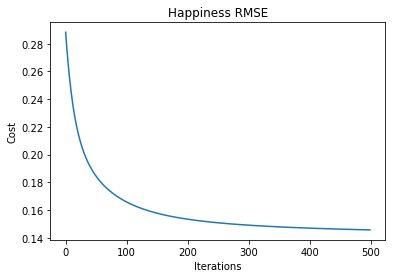

In [11]:
cost_plt1 = reg1.plot_cost()
cost_plt1.title('Happiness RMSE')
cost_plt1.xlabel('Iterations')
cost_plt1.ylabel('Cost')

In [12]:
reg2 = LinReg()
y_train_e = np.array(y_train['energeticness'])
y_train_e.reshape(514, 1)

reg2.fit(X_train,y_train_h)

In [13]:
preds2 = reg2.predict(X_test)
print(mean_squared_error(preds2, y_test['energeticness']))

0.42780197524354246


Text(0, 0.5, 'Cost')

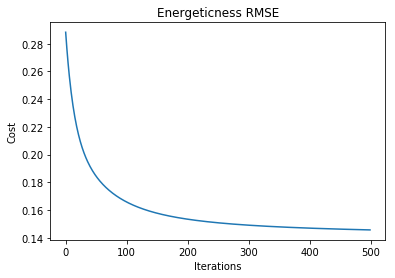

In [14]:
cost_plt2 = reg2.plot_cost()
cost_plt1.title('Energeticness RMSE')
cost_plt1.xlabel('Iterations')
cost_plt1.ylabel('Cost')